In [1]:
include("load_save.jl")
dataset_name = String(split(split(@__FILE__, '\\')[end], '.')[1])
R, X, Y, L, F, Y, PY = load_big_dataset(dataset_name);

Dataset : AB_B


In [2]:
using Pandas, Seaborn

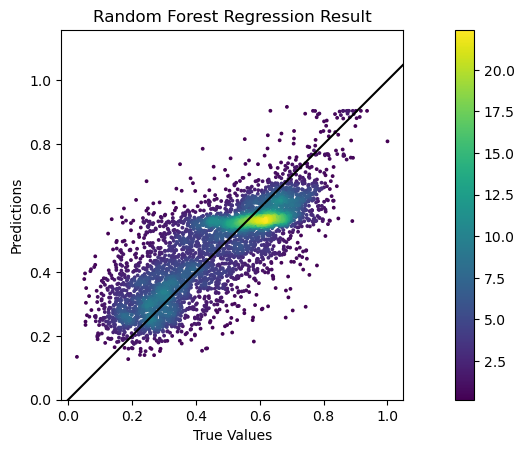

NRMSE : 0.116087


In [3]:
view_result(PY, Y, data_state);

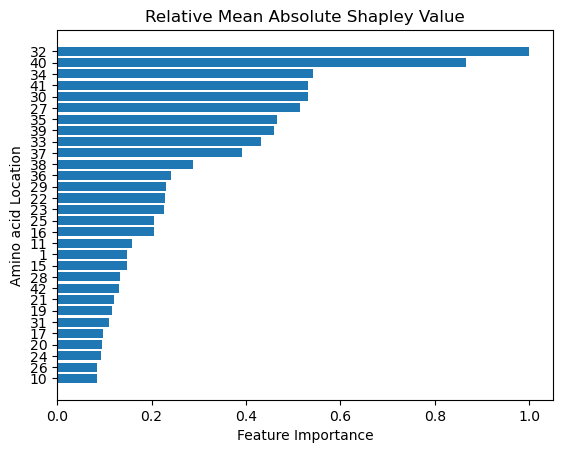

In [4]:
view_importance(R, L, F, show_number=30);

In [5]:
gtag = Vector{String}()
tag = Vector{String}()
NL = Vector{String}()
gf = Vector{Float64}()
f = Vector{Float64}()

for (loc, fe) in zip(L, F)
    if loc ∈ [1, 3, 7, 11, 22, 17, 42]
        push!(gtag, "Gatekeeper")
        push!(NL, string(loc))
        push!(gf, fe)
    elseif loc ≤ 26
        push!(tag, "N-terminus")
        push!(NL, string(loc))
        push!(f, fe)
    else
        push!(tag, "C-terminus")
        push!(NL, "*" * string(loc))
        push!(f, fe)
    end
end
data = Pandas.DataFrame(Dict("Feature Importance" => f, "AA type" => tag))
gdata = Pandas.DataFrame(Dict("Feature Importance" => gf, "AA type" => gtag));

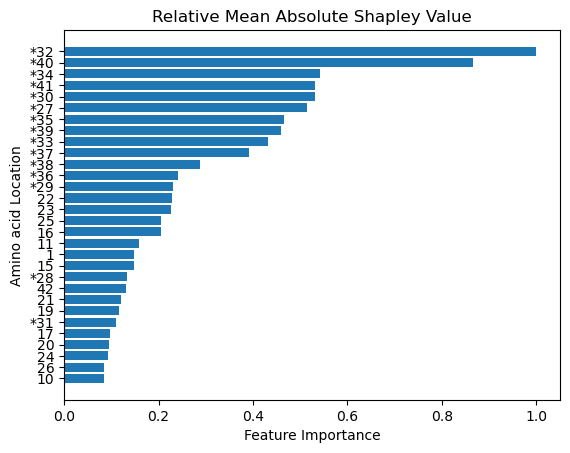

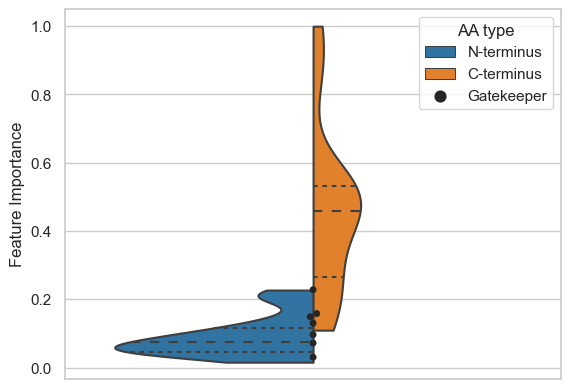

In [6]:
view_importance(R, NL, F, show_number=30)
data["all"] = ""
gdata["all"] = ""
set_theme(style="whitegrid", palette="tab10")
violinplot(x="all", y="Feature Importance", hue="AA type", inner="quartile", data=data, split=true, bw=0.4, cut=0)
swarmplot(x="all", y="Feature Importance", hue="AA type", color="white", data=gdata)
xlabel("")
display(gcf())
close("all")
matplotlib.rc_file_defaults()